# 🧩 Notebook 05: Time Series Modeling (AR, MA, ARIMA)

In [1]:
# Setup and Imports

import pandas as pd
from pathlib import Path
import sys

# ✅ Setup path to use utils
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

# Project-level imports
from utils.visual_utils import save_and_show_plot
from utils.diagnostics import plot_acf_pacf
from utils.model_utils import export_forecast_to_csv

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
DATA_PATH = Path("../synthetic_data")
EXPORT_PLOTS = Path("../exports/plots/05_time_series_analysis")
EXPORT_TABLES = Path("../exports/tables/05_time_series_analysis")

EXPORT_PLOTS.mkdir(parents=True, exist_ok=True)
EXPORT_TABLES.mkdir(parents=True, exist_ok=True)

# Load ARIMA-style series
df = pd.read_csv(DATA_PATH / "arima_series.csv", parse_dates=["t"])
df = df.rename(columns={"t": "date", "value": "y"}).set_index("date")
df.head()

,y
date,
2020-01-01,0.000000
2020-01-02,-1.821588
2020-01-03,-1.294983
2020-01-04,-0.743894
2020-01-05,0.473377


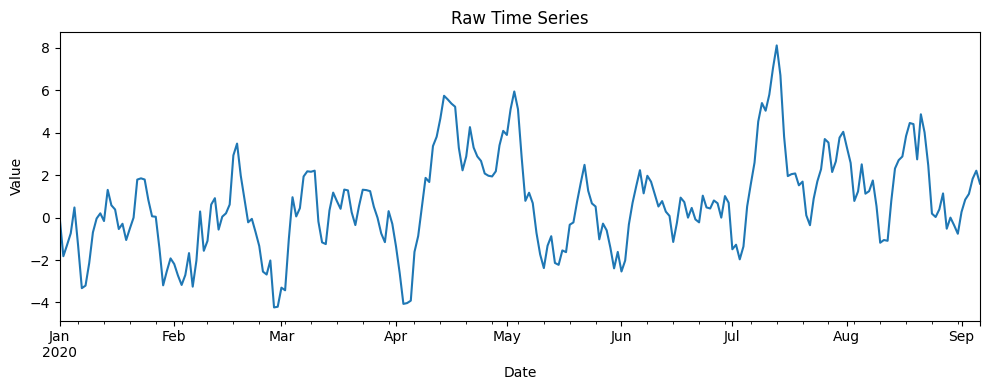

In [3]:
# Visualize Raw Series
plt.figure(figsize=(10, 4))
df["y"].plot()
plt.title("Raw Time Series")
plt.xlabel("Date")
plt.ylabel("Value")
plt.tight_layout()
save_and_show_plot("raw_series", EXPORT_PLOTS);

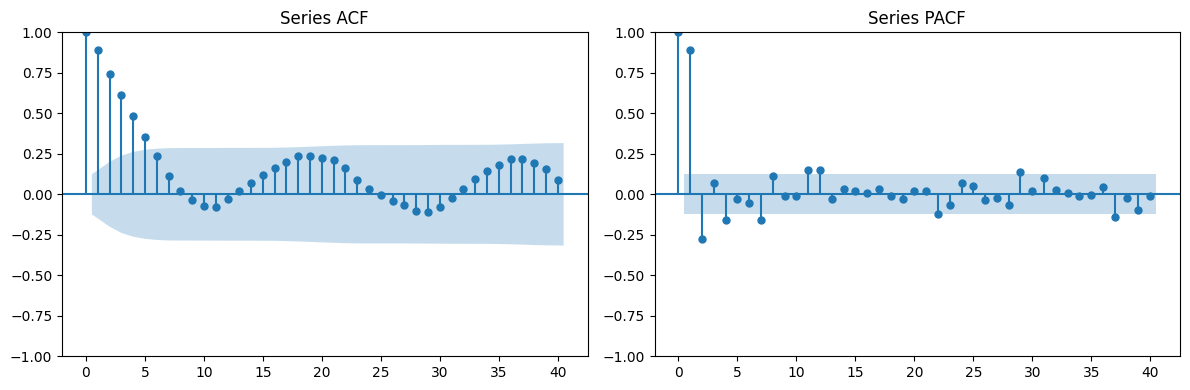

In [4]:
# ACF and PACF Plots

plot_acf_pacf(df["y"], lags=40, title_prefix="Series")
save_and_show_plot("acf_pacf", EXPORT_PLOTS);

## 🔁 Part 1: Fit ARIMA(1,0,1)

In [5]:
# Fit ARIMA(1,0,1)
model_arima = ARIMA(df["y"], order=(1, 0, 1)).fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  250
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -346.079
Date:                Sat, 26 Jul 2025   AIC                            700.158
Time:                        23:25:18   BIC                            714.244
Sample:                    01-01-2020   HQIC                           705.827
                         - 09-06-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7185      0.473      1.519      0.129      -0.209       1.646
ar.L1          0.8250      0.038     21.777      0.000       0.751       0.899
ma.L1          0.3522      0.068      5.217      0.0

/Users/satvikpraveen/Desktop/Libraries/StatsmodelsMasterPro/sm_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/satvikpraveen/Desktop/Libraries/StatsmodelsMasterPro/sm_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/satvikpraveen/Desktop/Libraries/StatsmodelsMasterPro/sm_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


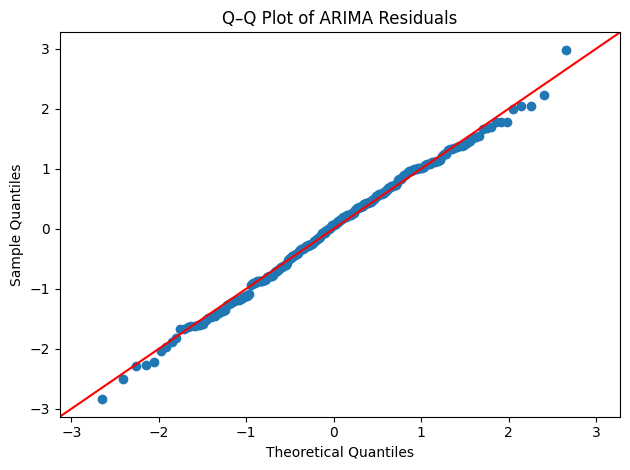

In [6]:
# Q–Q Plot of Residuals
fig = sm.qqplot(model_arima.resid, line="45", fit=True)
plt.title("Q–Q Plot of ARIMA Residuals")
save_and_show_plot("residuals_qqplot", EXPORT_PLOTS);

In [7]:
# Forecast Next 30 Days

# Forecast
forecast_result = model_arima.get_forecast(steps=30)
forecast_df = forecast_result.summary_frame()
forecast_df.index.name = "date"

# Export forecast table
export_forecast_to_csv(forecast_df, EXPORT_TABLES / "forecast_arima.csv")
forecast_df.head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
date,,,,
2020-09-07,1.276544,0.962531,-0.609981,3.163070
2020-09-08,1.178880,1.486729,-1.735054,4.092815
2020-09-09,1.098309,1.756182,-2.343743,4.540362
2020-09-10,1.031840,1.918042,-2.727453,4.791133
2020-09-11,0.977004,2.020802,-2.983696,4.937703


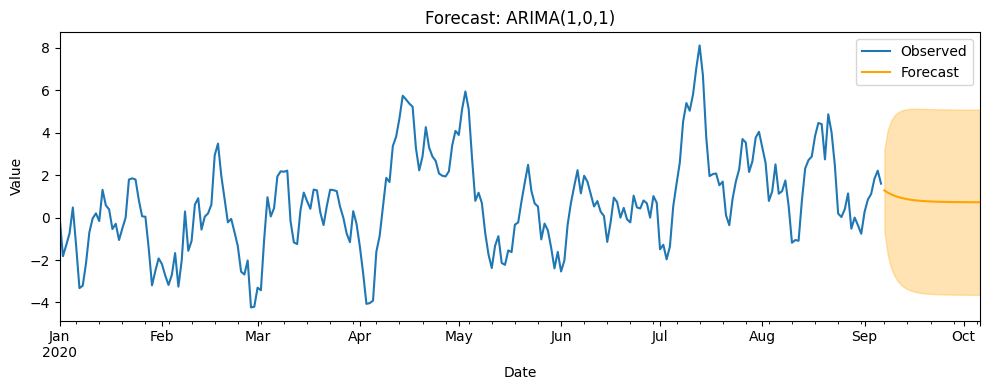

In [8]:
# Plot Forecast

plt.figure(figsize=(10, 4))
df["y"].plot(label="Observed")
forecast_df["mean"].plot(label="Forecast", color="orange")
plt.fill_between(forecast_df.index, forecast_df["mean_ci_lower"], forecast_df["mean_ci_upper"], 
                 color="orange", alpha=0.3)
plt.title("Forecast: ARIMA(1,0,1)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
save_and_show_plot("forecast_plot", EXPORT_PLOTS);

## 📌 Takeaways

- The ACF and PACF patterns supported use of an ARIMA(1,0,1) model
- Residual Q–Q plot showed normality, validating model fit assumptions
- Forecasts were stable with reasonable confidence intervals
- This notebook sets the foundation for more advanced models (ARIMA-X, SARIMA)

## ✅ Summary:
- Loaded synthetic ARIMA-ready time series (`arima_series.csv`)
- Visualized raw series, then explored stationarity visually
- Plotted ACF and PACF to guide model selection
- Fitted ARIMA(1, 0, 1) model using `statsmodels.tsa.ARIMA`
- Evaluated model residuals via Q–Q and histogram
- Forecasted future values and plotted confidence intervals
- Exported forecast table and all plots